# Incidence de la varicelle 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [6]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

data_file = "inc-7-PAY.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [10]:
data_csv_path = "inc-7-PAY.csv"
raw_data = pd.read_csv(data_csv_path, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202443          7   2701      725    4677       4           1   
1     202442          7   2659     1260    4058       4           2   
2     202441          7   2035      381    3689       3           1   
3     202440          7   2125      725    3525       3           1   
4     202439          7   2898     1333    4463       4           2   
5     202438          7    751        0    1513       1           0   
6     202437          7    916       28    1804       1           0   
7     202436          7   2235      870    3600       3           1   
8     202435          7   1620      285    2955       2           0   
9     202434          7   2560      622    4498       4           1   
10    202433          7   1971      536    3406       3           1   
11    202432          7   4399     1944    6854       7           3   
12    202431          7   4500     2213    6787       7           4   
13    202430          7   7004     4278    9730      11           7   
14    202429          7   9270     6303   12237      14          10   
15    202428          7   9364     6498   12230      14          10   
16    202427          7  10247     7090   13404      15          10   
17    202426          7  14368    10399   18337      22          16   
18    202425          7  11174     8039   14309      17          12   
19    202424          7  12621     9357   15885      19          14   
20    202423          7  14657    11339   17975      22          17   
21    202422          7  11628     8361   14895      17          12   
22    202421          7   9701     6851   12551      15          11   
23    202420          7  13661    10209   17113      20          15   
24    202419          7  10083     6413   13753      15           9   
25    202418          7  13438     9514   17362      20          14   
26    202417          7  15303    11219   19387      23          17   
27    202416          7  18138    13540   22736      27          20   
28    202415          7  24929    17315   32543      37          26   
29    202414          7  16181    12544   19818      24          19   
...      ...        ...    ...      ...     ...     ...         ...   
1739  199126          7  17608    11304   23912      31          20   
1740  199125          7  16169    10700   21638      28          18   
1741  199124          7  16171    10071   22271      28          17   
1742  199123          7  11947     7671   16223      21          13   
1743  199122          7  15452     9953   20951      27          17   
1744  199121          7  14903     8975   20831      26          16   
1745  199120          7  19053    12742   25364      34          23   
1746  199119          7  16739    11246   22232      29          19   
1747  199118          7  21385    13882   28888      38          25   
1748  199117          7  13462     8877   18047      24          16   
1749  199116          7  14857    10068   19646      26          18   
1750  199115          7  13975     9781   18169      25          18   
1751  199114          7  12265     7684   16846      22          14   
1752  199113          7   9567     6041   13093      17          11   
1753  199112          7  10864     7331   14397      19          13   
1754  199111          7  15574    11184   19964      27          19   
1755  199110          7  16643    11372   21914      29          20   
1756  199109          7  13741     8780   18702      24          15   
1757  199108          7  13289     8813   17765      23          15   
1758  199107          7  12337     8077   16597      22          15   
1759  199106          7  10877     7013   14741      19          12   
1760  199105          7  10442     6544   14340      18          11   
1761  199104          7   7913     4563   11263      14           8   
1762  199103          7  15387    10484   20290      27          18   
1763  199102          7  16277  

In [13]:
raw_data[raw_data.isnull().any(axis=1)]
data = raw_data.dropna().copy()

In [14]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [16]:
sorted_data = data.set_index('period').sort_index()

In [17]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

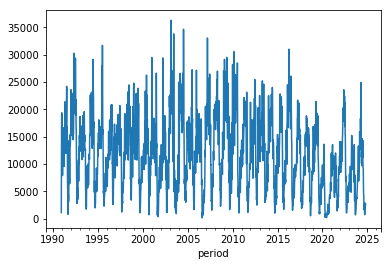

In [18]:
sorted_data['inc'].plot()

## Incidence annuelle

In [24]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [26]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

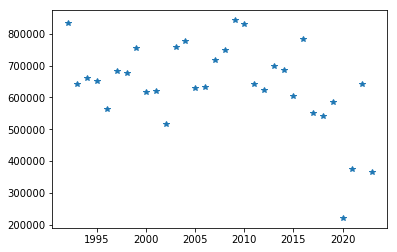

In [27]:
yearly_incidence.plot(style='*')

In [28]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64